In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [97]:
!head nso_lsof.log

Tue May  4 09:57:11 EDT 2021 -- File Descriptors ncs  : 371
Tue May  4 09:57:11 EDT 2021 -- File Descriptors 1678 : 71
Tue May  4 09:57:11 EDT 2021 -- File Descriptors 32609: 442
Tue May  4 10:07:11 EDT 2021 -- File Descriptors ncs  : 371
Tue May  4 10:07:11 EDT 2021 -- File Descriptors 1678 : 71
Tue May  4 10:07:11 EDT 2021 -- File Descriptors 32609: 442
Tue May  4 10:17:11 EDT 2021 -- File Descriptors ncs  : 370
Tue May  4 10:17:11 EDT 2021 -- File Descriptors 1678 : 71
Tue May  4 10:17:11 EDT 2021 -- File Descriptors 32609: 442
Tue May  4 10:27:11 EDT 2021 -- File Descriptors ncs  : 370


In [169]:
!awk '/File Descriptors ncs/' nso_lsof.log > 1.log
!awk '/File Descriptors 1678/' nso_lsof.log > 2.log
!awk '/File Descriptors 32609/' nso_lsof.log > 3.log

In [170]:
df = pd.read_csv('1.log', sep=':|--', engine='python', header=None, skipinitialspace=True)

df.head()

,0,1,2,3,4
0,Tue May 4 09,57,11 EDT 2021,File Descriptors ncs,371
1,Tue May 4 10,7,11 EDT 2021,File Descriptors ncs,371
2,Tue May 4 10,17,11 EDT 2021,File Descriptors ncs,370
3,Tue May 4 10,27,11 EDT 2021,File Descriptors ncs,370
4,Tue May 4 10,37,11 EDT 2021,File Descriptors ncs,371


In [171]:
df['date'] = df[0] + ":" + df[1].apply(str) + ":" + df[2]
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df = df.rename(columns = {4:'num'})
#df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958 entries, 0 to 3957
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                                 
---  ------  --------------  -----                                 
 0   0       3958 non-null   object                                
 1   1       3958 non-null   int64                                 
 2   2       3958 non-null   object                                
 3   3       3958 non-null   object                                
 4   num     3958 non-null   int64                                 
 5   date    3958 non-null   datetime64[ns, pytz.FixedOffset(-240)]
dtypes: datetime64[ns, pytz.FixedOffset(-240)](1), int64(2), object(3)
memory usage: 185.7+ KB


In [172]:
df.head()

,0,1,2,3,num,date
0,Tue May 4 09,57,11 EDT 2021,File Descriptors ncs,371,2021-05-04 09:57:11-04:00
1,Tue May 4 10,7,11 EDT 2021,File Descriptors ncs,371,2021-05-04 10:07:11-04:00
2,Tue May 4 10,17,11 EDT 2021,File Descriptors ncs,370,2021-05-04 10:17:11-04:00
3,Tue May 4 10,27,11 EDT 2021,File Descriptors ncs,370,2021-05-04 10:27:11-04:00
4,Tue May 4 10,37,11 EDT 2021,File Descriptors ncs,371,2021-05-04 10:37:11-04:00


<AxesSubplot:xlabel='date'>

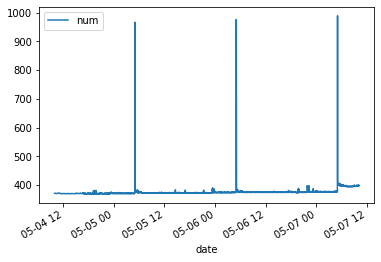

In [160]:
df.plot.line(x='date', y='num')

In [161]:
df['num'].describe()

count    3958.000000
mean      376.364578
std        25.229715
min       369.000000
25%       371.000000
50%       374.000000
75%       375.000000
max       989.000000
Name: num, dtype: float64

In [162]:
df['num'].value_counts()

375    729
372    629
371    536
374    490
370    339
376    294
373    244
377    124
369    116
395     94
397     51
396     44
398     37
394     33
378     27
379     27
382     17
403     16
381     15
399     14
380     14
384     11
402      7
400      6
383      5
393      5
390      5
405      4
404      3
385      2
386      2
967      2
401      2
419      1
421      1
437      1
507      1
613      1
388      1
387      1
980      1
976      1
964      1
620      1
576      1
448      1
989      1
Name: num, dtype: int64

In [163]:
df_mod=df[df['num'].between(1, 390)]
#df_mod=df[df['num'].between(1, 455)]

df_mod['num'].describe()

count    3628.000000
mean      373.316152
std         2.590857
min       369.000000
25%       371.000000
50%       373.000000
75%       375.000000
max       390.000000
Name: num, dtype: float64

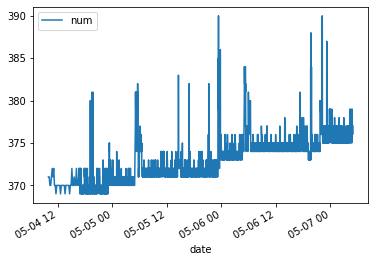

In [164]:
p = df_mod.plot.line(x='date', y='num')

In [165]:
p.get_figure().savefig('myfile.pdf')